In [1]:
import pandas as pd

In [2]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [3]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [4]:
# считаем все-все данные

In [5]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [6]:
train.shape

(15223, 52)

In [7]:
train_ = train[~train['WORK_TIME'].isnull()]

In [8]:
train_.shape

(13855, 52)

In [9]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [10]:
test.shape

(14910, 51)

In [11]:
# отделим таргет от TRAIN-а

In [12]:
y = train_['TARGET']

In [13]:
y.shape

(13855,)

In [14]:
train = train.drop('TARGET', axis=1)

In [15]:
train.shape

(15223, 51)

In [16]:
# соеденим train и test

In [17]:
all_data = pd.concat([train, test])

In [18]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [19]:
# посмотрим типы данных и их заполняемость

In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [21]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [22]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Среднее', 'Неоконченное высшее', 'Среднее специальное', 'Высшее', 'Ученая степень', 'Неполное среднее', 'Два и более высших образования'}

MARITAL_STATUS
{'Не состоял в браке', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова', 'Разведен(а)'}

GEN_INDUSTRY
{nan, 'Управляющая компания', 'Нефтегазовая промышленность', 'ЧОП/Детективная д-ть', 'Ресторанный бизнес/Общественное питание', 'Образование', 'Транспорт', 'Сельское хозяйство', 'Маркетинг', 'Подбор персонала', 'Торговля', 'Развлечения/Искусство', 'Салоны красоты и здоровья', 'СМИ/Реклама/PR-агенства', 'Государственная служба', 'Строительство', 'Туризм', 'Логистика', 'Сборочные производства', 'Коммунальное хоз-во/Дорожные службы', 'Наука', 'Химия/Парфюмерия/Фармацевтика', 'Банк/Финансы', 'Информационные услуги', 'Недвижимость', 'Другие сферы', 'Информационные технологии', 'Юридические услуги/нотариальные услуги', 'Металлургия/Промышленность/Машиностроение', 'Здравоохранение', 'Страхование', 'Энергетика'}

GEN_TITLE
{na

In [23]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [24]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [25]:
# причина же что использовалась запятая для разделения не целой части числа

In [26]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [27]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [28]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Среднее', 'Неоконченное высшее', 'Среднее специальное', 'Высшее', 'Ученая степень', 'Неполное среднее', 'Два и более высших образования'}

MARITAL_STATUS
{'Не состоял в браке', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова', 'Разведен(а)'}

GEN_INDUSTRY
{nan, 'Управляющая компания', 'Нефтегазовая промышленность', 'ЧОП/Детективная д-ть', 'Ресторанный бизнес/Общественное питание', 'Образование', 'Транспорт', 'Сельское хозяйство', 'Маркетинг', 'Подбор персонала', 'Торговля', 'Развлечения/Искусство', 'Салоны красоты и здоровья', 'СМИ/Реклама/PR-агенства', 'Государственная служба', 'Строительство', 'Туризм', 'Логистика', 'Сборочные производства', 'Коммунальное хоз-во/Дорожные службы', 'Наука', 'Химия/Парфюмерия/Фармацевтика', 'Банк/Финансы', 'Информационные услуги', 'Недвижимость', 'Другие сферы', 'Информационные технологии', 'Юридические услуги/нотариальные услуги', 'Металлургия/Промышленность/Машиностроение', 'Здравоохранение', 'Страхование', 'Энергетика'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [29]:
# Есть ли пропуски в данных? что с ними сделать?

all_data = all_data[~all_data['WORK_TIME'].isnull()]


In [30]:
# Как поступить со строковыми переменными?

all_data = all_data.drop(['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'PREVIOUS_CARD_NUM_UTILIZED'], axis=1)


In [31]:
# В итоге должны получиться данные без пропусков и только числовые

all_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27416 entries, 0 to 30132
Data columns (total 37 columns):
AGREEMENT_RK           27416 non-null int64
AGE                    27416 non-null int64
SOCSTATUS_WORK_FL      27416 non-null int64
SOCSTATUS_PENS_FL      27416 non-null int64
GENDER                 27416 non-null int64
CHILD_TOTAL            27416 non-null int64
DEPENDANTS             27416 non-null int64
PERSONAL_INCOME        27416 non-null float64
REG_FACT_FL            27416 non-null int64
FACT_POST_FL           27416 non-null int64
REG_POST_FL            27416 non-null int64
REG_FACT_POST_FL       27416 non-null int64
REG_FACT_POST_TP_FL    27416 non-null int64
FL_PRESENCE_FL         27416 non-null int64
OWN_AUTO               27416 non-null int64
AUTO_RUS_FL            27416 non-null int64
HS_PRESENCE_FL         27416 non-null int64
COT_PRESENCE_FL        27416 non-null int64
GAR_PRESENCE_FL        27416 non-null int64
LAND_PRESENCE_FL       27416 non-null int64
CREDIT   

In [32]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)

mask = all_data['AGREEMENT_RK'] - train['AGREEMENT_RK'] == 0
mask

train, test = all_data[mask], all_data[~mask]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [33]:
train.shape

(13855, 37)

In [34]:
test.shape

(13561, 37)

In [35]:
# Сделать hold-out sampling на train выборке

from sklearn.model_selection import train_test_split

# test_size=0.3, random_state=42

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

In [36]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import precision_score, accuracy_score, recall_score

In [38]:
#DecisionTreeClassifier
#     fit

dtc = DecisionTreeClassifier(max_depth=200)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=200,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
#DecisionTreeClassifier
#     predict

predict_dtc = dtc.predict(X_test)

print('precision_dtc', precision_score(y_test, predict_dtc))
print('recall_dtc', recall_score(y_test, predict_dtc))
print('accuracy_dtc', accuracy_score(y_test, predict_dtc))

precision_dtc 0.1664025356576862
recall_dtc 0.20192307692307693
accuracy_dtc 0.7736348328121241


In [40]:
#DecisionTreeClassifier
#     predict_proba

predict_dtc_p = dtc.predict_proba(X_test)
predict_dtc_p[:,0]

array([1., 1., 1., ..., 1., 1., 1.])

In [41]:
#RandomForestClassifier
#     fit

rfc = RandomForestClassifier(max_depth=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=200, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
#RandomForestClassifier
#     predict

predict_rfc = rfc.predict(X_test)

print('precision_rfc', precision_score(y_test, predict_rfc))
print('recall_rfc', recall_score(y_test, predict_rfc))
print('accuracy_rfc', accuracy_score(y_test, predict_rfc))

precision_rfc 0.16666666666666666
recall_rfc 0.009615384615384616
accuracy_rfc 0.8700986288188598


In [43]:
#RandomForestClassifier
#     predict_proba

predict_rfc_p = rfc.predict_proba(X_test)
predict_rfc_p[:,0]

array([0.8, 1. , 0.9, ..., 0.8, 0.8, 1. ])

In [44]:
#LogisticRegression
#     fit

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
#LogisticRegression
#     predict

predict_lr = lr.predict(X_test)

print('precision_lr', precision_score(y_test, predict_lr))
print('recall_lr', recall_score(y_test, predict_lr))
print('accuracy_lr', accuracy_score(y_test, predict_lr))

precision_lr 0.0
recall_lr 0.0
accuracy_lr 0.8749097907144575


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
#LogisticRegression
#     predict_proba

predict_lr_p = lr.predict_proba(X_test)
predict_lr_p[:,0]

array([0.87587268, 0.86173667, 0.8773702 , ..., 0.85777912, 0.85436146,
       0.86281677])

Text(0,0.5,'recall')

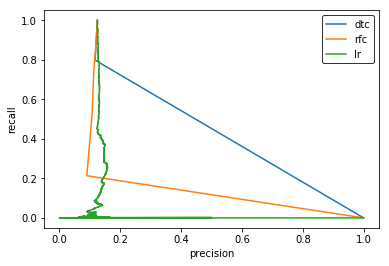

In [47]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_recall_curve

precision_dtc, recall_dtc, thresholds = precision_recall_curve(y_test, predict_dtc_p[:,0]) 
precision_rfc, recall_rfc, thresholds = precision_recall_curve(y_test, predict_rfc_p[:,0]) 
precision_lr, recall_lr, thresholds = precision_recall_curve(y_test, predict_lr_p[:,0]) 

plt.plot(precision_dtc, recall_dtc) 

plt.plot(precision_rfc, recall_rfc) 

plt.plot(precision_lr, recall_lr) 

leg = plt.legend(('dtc', 'rfc', 'lr'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('precision') 
plt.ylabel('recall')

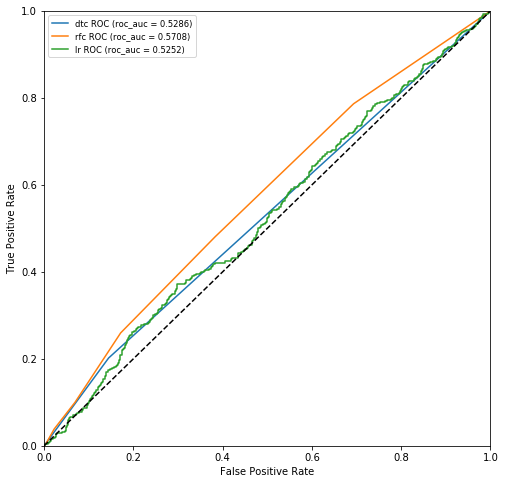

In [48]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели

from sklearn.metrics import roc_auc_score, roc_curve, auc

plt.clf()
plt.figure(figsize=(8,8))

#DecisionTreeClassifier
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, predict_dtc_p[:, 1])
roc_auc_dtc  = auc(fpr_dtc, tpr_dtc)

plt.plot(fpr_dtc, tpr_dtc, label='%s ROC (roc_auc = %0.4f)' % ('dtc', roc_auc_dtc))

#RandomForestClassifier
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, predict_rfc_p[:, 1])
roc_auc_rfc  = auc(fpr_rfc, tpr_rfc)

plt.plot(fpr_rfc, tpr_rfc, label='%s ROC (roc_auc = %0.4f)' % ('rfc',roc_auc_rfc))

#LogisticRegression
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, predict_lr_p[:, 0])
roc_auc_lr  = auc(fpr_lr, tpr_lr)

plt.plot(fpr_lr, tpr_lr, label='%s ROC (roc_auc = %0.4f)' % ('lr',roc_auc_lr))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

In [49]:
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier()
cross_val_score(
    dtc,
    train,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.5215961133383409

In [50]:
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    train,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.5613915834203264

In [51]:
lr = LogisticRegression()
cross_val_score(
    lr,
    train,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.4157629464955816

In [52]:
#он получился меньше 50% - логично было бы его перевернуть

1 - 0.4157629464955816

0.5842370535044183

In [53]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

#получилось, что самая лучшая - LogisticRegression

lr_test = LogisticRegression(max_iter=200)
lr_test.fit(train, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
predict_test = lr_test.predict_proba(test)

In [55]:
predict_test [:,0]

array([0.85340349, 0.85312574, 0.85330026, ..., 0.90142093, 0.90144967,
       0.90146806])